<a href="https://colab.research.google.com/github/Tech-savvyPavithra/Data_Science/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 2 MNIST Demo#1

Step_0:Load Tensorflow

In [ ]:
import tensorflow as tf

Step_1: Load MNIST dataset and convert sames to floating point numbers from integers

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


Step_2: Build the model,choose an optimizer and the loss function

In [ ]:
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10)
])

Step_3:Take a look at what the model is doing in terms of outputs-vectors

In [ ]:
predictions=model(X_train[:1]).numpy()
predictions

array([[ 0.43057585,  0.5678297 , -0.6273698 , -0.51104444, -0.296053  ,
        -0.2553412 ,  0.2505122 , -0.4781366 , -0.03310621,  0.00230055]],
      dtype=float32)

Step_4:We need the probability of each class instead of the vectors

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.15648709, 0.17950937, 0.05432736, 0.06102926, 0.0756672 ,
        0.07881131, 0.13070069, 0.063071  , 0.09842467, 0.10197199]],
      dtype=float32)

Step_5: Finding the scalar loss for each example

In [ ]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(Y_train[:1],predictions). numpy()

2.5406988

Step_6:Model Compilation

In [ ]:
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

Step_7:Model fitting to minimize the loss

In [ ]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3000 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1437 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1076 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0877 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - accuracy: 0.9759


Step_8:Model evaluation

In [ ]:
model.evaluate(X_test,Y_test,verbose=2)

313/313 - 1s - loss: 0.0798 - accuracy: 0.9769 - 670ms/epoch - 2ms/step


[0.07984624058008194, 0.9768999814987183]

Demo#2:Binary Classification using Convolutional Neural Network(CNNs)

Demo2:Image Classification using CNNs

Importing training and testing dataset

In [ ]:
!wget http://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-01-05 11:02:35--  http://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip [following]
--2024-01-05 11:02:35--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2024-01-05 11:02:35--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3cd83d6d39ff74a3f3cfa4aa6.dl.dropboxusercontent.com/cd/0/inline/CKxFIkGRhk1FCpJ-p47WEEAOXuBE3JtheivpYDzBf7MiSkviL1A2

Unzipping the compressed dataset

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

Archive:  training_set.zip
replace training_set/training_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  test_set.zip
replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Printing a sample image of a cat

Populating the interactive namespace from numpy and matplotlib


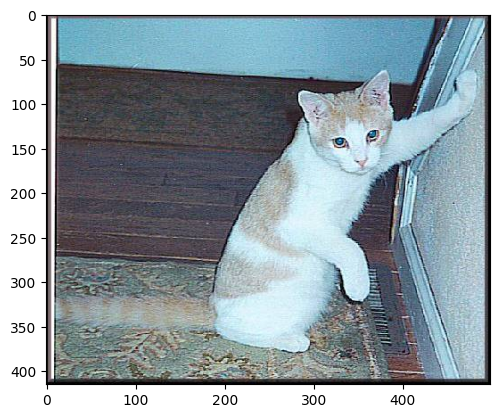

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img=npimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot=plt.imshow(img)
plt.show()

Printing a sample image of a dog

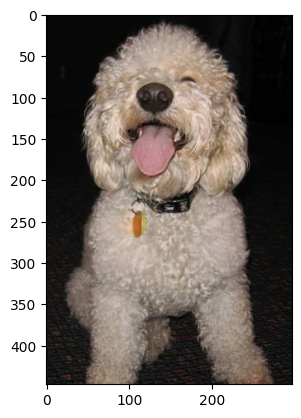

In [ ]:
img=npimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot=plt.imshow(img)
plt.show()

Importing the required libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as npimg

Tensorflow Version that we are using

In [ ]:
print(tensorflow.__version__)

2.15.0


Parameter initialization

In [ ]:
img_width,img_height=150,150
train_data_dir=r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample=100
nb_validation_samples=100
epochs=20
batch_size=20

Checking shapes of the images

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
   input_shape=(3,img_width,img_height)
else:
   input_shape=(img_width,img_height,3)

Image generation to train the model

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255) #Bringing RGB values from 0-255 to a range of 0-1
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Representation of ImageDataGenerator

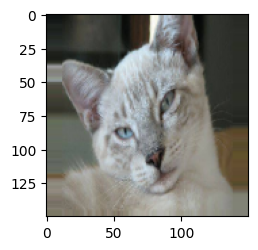

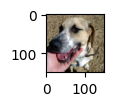

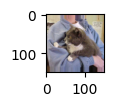

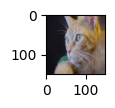

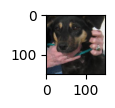

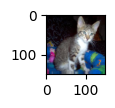

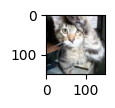

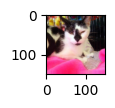

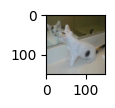

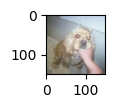

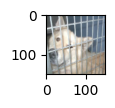

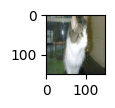

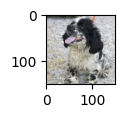

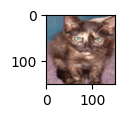

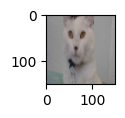

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch,Y_batch in train_generator:
        image=X_batch[0]
        plt.imshow(image)
        break
    plt.tight_layout()
    plt.show()

Building the CNN Model

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons using a 3x3 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #Pooling reduces the size of the data
model.add(Flatten()) #Conversion of multi-dimensional array to 1D array
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1)) #Output layer
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

Model Compilation

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

Model Fitting

In [ ]:
training=model.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 142s 1s/step - loss: 0.6178 - accuracy: 0.6524 - val_loss: 0.5864 - val_accuracy: 0.6975
Epoch 2/20
100/100 [==============================] - 123s 1s/step - loss: 0.6144 - accuracy: 0.6680 - val_loss: 0.5993 - val_accuracy: 0.6750
Epoch 3/20
100/100 [==============================] - 141s 1s/step - loss: 0.5978 - accuracy: 0.6860 - val_loss: 0.5833 - val_accuracy: 0.6835
Epoch 4/20
100/100 [==============================] - 141s 1s/step - loss: 0.6002 - accuracy: 0.6756 - val_loss: 0.5913 - val_accuracy: 0.6845
Epoch 5/20
100/100 [==============================] - 140s 1s/step - loss: 0.5807 - accuracy: 0.7005 - val_loss: 0.5561 - val_accuracy: 0.7165
Epoch 6/20
100/100 [==============================] - 140s 1s/step - loss: 0.5787 - accuracy: 0.6970 - val_loss: 0.5837 - val_accuracy: 0.6910
Epoch 7/20
100/100 [==============================] - 120s 1s/step - loss: 0.5862 - accuracy: 0.6950 - val_loss: 0.5684 - val_accuracy: 0.6980

Finding out Model accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


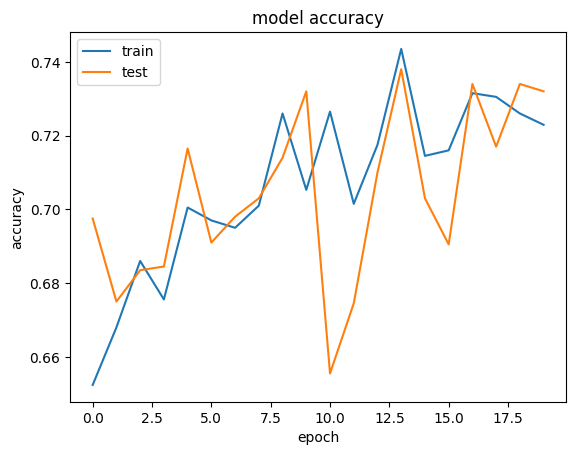

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys()) #Listing all training data
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Image Prediction

1/1 [==============================] - 0s 118ms/step
[[0.]]
Prediction: Cat


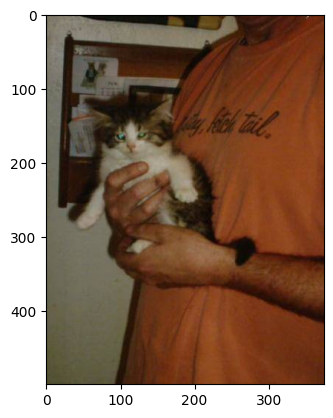

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred=image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
rslt=model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
   prediction="Dog"
else:
   prediction="Cat"
   print('Prediction:', prediction)
img=npimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')
imgplot=plt.imshow(img)
plt.show()